# Web Scraping for Reddit & Predicting Comments

In this project, we will practice two major skills. Collecting data by scraping a website and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
from IPython.core.debugger import set_trace
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [2]:
base_url = "https://www.reddit.com/"

In [3]:
## YOUR CODE HERE
# Establishing the connection to the web page:
# Store User-agent credentials 
user_agent_info = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.167 Safari/537.36'}
response = requests.get(base_url, headers=user_agent_info)

# You can use status codes to understand how the target server responds to your request.
# Ex., 200 = OK, 400 = Bad Request, 403 = Forbidden, 404 = Not Found.
# print(response.status_code)

# Pull the HTML string out of requests and convert it to a Python string.
html = response.text

# The first 700 characters of the content.
# print(html) 

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The thread title is within an `<a>` tag with the attribute `data-event-action="title"`.
- The time since the thread was created is within a `<time>` tag with attribute `class="live-timestamp"`.
- The subreddit is within an `<a>` tag with the attribute `class="subreddit hover may-blank"`.
- The number of comments is within an `<a>` tag with the attribute data-event-action="comments"`.

## Write 4 functions to extract these items (one function for each): title, time, subreddit, and number of comments.¶
Example
```python
def extract_title_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The thread title is within an `<a>` tag with the attribute `data-event-action="title"`.
- The time since the thread was created is within a `<time>` tag with attribute `class="live-timestamp"`.
- The subreddit is within an `<a>` tag with the attribute `class="subreddit hover may-blank"`.
- The number of comments is within an `<a>` tag with the attribute data-event-action="comments"`.

In [4]:
soup = BeautifulSoup(html, 'lxml')

In [5]:
# TITLE
# <a class="title may-blank loggedin outbound" data-event-action="title" href="https://www.hln.be/nieuws/binnenland/belgie-wint-rechtszaak-tegen-facebook-omdat-het-privacy-niet-respecteert~a81e5c64" tabindex="1" data-href-url="https://www.hln.be/nieuws/binnenland/belgie-wint-rechtszaak-tegen-facebook-omdat-het-privacy-niet-respecteert~a81e5c64" data-outbound-url="https://out.reddit.com/t3_7xyszx?url=https%3A%2F%2Fwww.hln.be%2Fnieuws%2Fbinnenland%2Fbelgie-wint-rechtszaak-tegen-facebook-omdat-het-privacy-niet-respecteert%7Ea81e5c64&amp;token=AQAA47GHWuzvgnwhB-ybfuvEO6Kc5MBHUiYUOg52Z04J4rR9EEvG&amp;app_name=reddit.com" data-outbound-expiration="1518842339000" rel="">Belgium wins trial against Facebook for violating privacy laws</a>

In [6]:
# FUNCTION TO EXTRACT TITLE FROM SOUP RESULT SET
### need to add error handling
def extract_title(soup):

    result_list = soup.body.find_all('a', {'data-event-action':'title'})

    results = []
    for result in result_list:
        thread_title = {}
        thread_title = result.text
        results.append(thread_title)

    return results 

In [7]:
# TIME 
# <time title="Fri Feb 16 13:46:19 2018 UTC" datetime="2018-02-16T13:46:19+00:00" class="live-timestamp">14 hours ago</time>

In [8]:
# FUNCTION TO EXTRACT TIME SINCE CREATED FROM SOUP RESULT SET 
### need to add error handling
def extract_time(soup): 

    result_list = soup.body.find_all('time', {'class':'live-timestamp'})

    results = []
    for result in result_list:
        time_since_created = {}
        time_since_created = result.text
        results.append(time_since_created)
        
    return results

In [9]:
# SUBREDDIT
# <a href="https://www.reddit.com/r/technology/" class="subreddit hover may-blank">r/technology</a>

In [10]:
# FUNCTION TO EXTRACT SUBREDDIT FROM SOUP RESULT SET 
### need to add error handling
def extract_subreddit(soup): 

    result_list = soup.body.find_all('a', {'class':'subreddit hover may-blank'})

    results = []
    for result in result_list:
        subreddit = {}
        subreddit = result.text
        results.append(subreddit)
        
    return results 

In [11]:
# COMMENTS 
# <a href="/r/technology/comments/7xyszx/belgium_wins_trial_against_facebook_for_violating/" data-inbound-url="/r/technology/comments/7xyszx/belgium_wins_trial_against_facebook_for_violating/?utm_content=comments&amp;utm_medium=best&amp;utm_source=reddit&amp;utm_name=frontpage" data-href-url="/r/technology/comments/7xyszx/belgium_wins_trial_against_facebook_for_violating/" data-event-action="comments" class="bylink comments may-blank" rel="nofollow">661 comments</a>

In [12]:
# FUNCTION TO EXTRACT NUMBER OF COMMENTS FROM SOUP RESULT SET  
### need to add error handling
def extract_comments(soup): 

    result_list = soup.body.find_all('a', {'data-event-action':'comments'})

    results = []
    for result in result_list:
        number_of_comments = {}
        number_of_comments = result.text
        results.append(number_of_comments)
        
    return results 

## Write one more function that finds the last `id` on the page, and stores it.

In [13]:
# FUNCTION TO EXTRACT LAST ID ON PAGE FROM SOUP RESULT SET 
### USE LINK FROM "NEXT" BUTTON INSTEAD 
### need to add error handling
def get_next_page(soup): 
    next_url = soup.body.find('span', {'class':'next-button'})
    next_url = next_url.find('a')['href']
    response = requests.get(next_url, headers = user_agent_info)
    html = response.text
    soup = BeautifulSoup(html, 'lxml') 

    return soup 

In [14]:
# FUNCTION TO RESET SOUP TO FIRST PAGE 
# reset url to first page and reload to soup (soup = reset(soup))
def reset(soup): 
    response = requests.get(base_url, headers = user_agent_info)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    
    return soup

In [15]:
# FUNCTION TO SAVE DATAFRAME TO CSV
# copied from below in order to have all functions defined before main run
def save_csv(i): 
    suffix = '_' + str(i) + '.csv'
    filepath = './scraped_data/test' + suffix 
    df_all.to_csv(filepath, encoding='utf-8')

## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

In [16]:
## YOUR CODE HERE

## Now, let's put it all together.

Use the functions you wrote above to parse out the 4 fields - title, time, subreddit, and number of comments. Create a dataframe from the results with those 4 columns.

In [ ]:
# COMBINE COLUMNS FROM FUNCTIONS INTO ONE CUMULATIVE DATAFRAME 
start_time = time.localtime()
print('Start time: ', start_time)
# start from first page
soup = reset(soup)

# set list holder and master dataframe
combined_list = []
df_all = pd.DataFrame()

# iterate through pages (25 rows per page)
for i in range(25, 501, 25): # start, max_rows, step

    # get page of reults for each column 
    titles = extract_title(soup)
    times = extract_time(soup)
    subreddits = extract_subreddit(soup)
    comments = extract_comments(soup)
    combined_list = [titles, times, subreddits, comments]

    # store page in temp dataframe
    df_temp = pd.DataFrame(combined_list)
    # need to flip rows and columns 
    df_temp = df_temp.transpose() 
    # add column names 
    df_temp.columns = ['Title', 'Time', 'Subreddit', 'Comments']

    # append current page df to master dataframe 
    df_all = df_all.append(df_temp)

    # incremental save 100 at a time with appropriate name
    if i % 100 == 0: 
        save_csv(i)

    # get next page and reset soup variable
    try: 
        soup = get_next_page(soup)
        print('Got next page at iteration ' + str(i))
    except:
        print('Error in get_next_page at iteration ' + str(i))
        break  

    # sleep to avoid too many requests
    time.sleep(3)

print("All done parsing " + str(i) + " records!")
end_time = time.localtime()
print('End time: ', end_time)

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [18]:
# # ADDED TO LIST OF FUNCTIONS ABOVE
# # Export to csv
# def save_csv(i): 
#     suffix = '_' + str(i) + '.csv'
#     filepath = './scraped_data/test' + suffix 
#     df_all.to_csv(filepath, encoding='utf-8')

### 
### 
### ALL DONE SCRAPING - LOAD FILES AND RUN MODELS/REPORTS FROM HERE DOWN
### 
### 

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [301]:
## YOUR CODE HERE
df_scraped = pd.DataFrame()
filepath = './scraped_data/'
filename = input("What is your filename? ")
fullpath = filepath + filename
try: 
    df_scraped = pd.read_csv(fullpath)
    print("File loaded into df_scraped.")
except: 
    print("Could not find that filename.")
    pass


What is your filename? test_5000.csv
File loaded into df_scraped.


In [302]:
df_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Unnamed: 0    5000 non-null int64
Title         5000 non-null object
Time          5000 non-null object
Subreddit     5000 non-null object
Comments      5000 non-null object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [303]:
df_scraped.head()

,Unnamed: 0,Title,Time,Subreddit,Comments
0,0,The Rock's stunt double is also his real-life ...,5 hours ago,r/pics,1178 comments
1,1,"[Image] Found a note from 2 months ago, made a...",1 hour ago,r/GetMotivated,208 comments
2,2,The next Wayne Gretzky,4 hours ago,r/gifs,1068 comments
3,3,Joel McHale says E! told him to lay off the Ka...,6 hours ago,r/television,1120 comments
4,4,It’s the truth...,4 hours ago,r/gaming,590 comments


In [304]:
# DROP Unnamed: 0 COLUMN 
df_scraped = df_scraped.drop('Unnamed: 0', axis=1)
df_scraped.head()

,Title,Time,Subreddit,Comments
0,The Rock's stunt double is also his real-life ...,5 hours ago,r/pics,1178 comments
1,"[Image] Found a note from 2 months ago, made a...",1 hour ago,r/GetMotivated,208 comments
2,The next Wayne Gretzky,4 hours ago,r/gifs,1068 comments
3,Joel McHale says E! told him to lay off the Ka...,6 hours ago,r/television,1120 comments
4,It’s the truth...,4 hours ago,r/gaming,590 comments


In [305]:
# STRIP STRING FROM COMMENTS AND TRANSFORM TO INT 
nums = df_scraped.Comments.str.replace(' comments', '')
nums = nums.str.replace('comment', '1')
nums = nums.str.replace(' ', '')
df_scraped.Comments = nums.astype(int)

In [306]:
df_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Title        5000 non-null object
Time         5000 non-null object
Subreddit    5000 non-null object
Comments     5000 non-null int32
dtypes: int32(1), object(3)
memory usage: 136.8+ KB


#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [307]:
# GET MEDIAN VALUE FOR COMMENTS AND ASSIGN BINARY VARIABLE
median = int(np.median(df_scraped.Comments))
print('Median:', median)
df_scraped['High'] = pd.Series()
high = 0
max_count = df_scraped.Comments.count()
for row in range(0, max_count): 
    #for comment in df_scraped.Comments: 
        if df_scraped.Comments[row] > median: 
            #high = 1
            #print('High!!!', high) # <== 1, high=True'
            df_scraped['High'][row] = int(1)
        else: 
            #high = 0
            #print('Low...', high) # <== 0, high=False
            df_scraped['High'][row] = int(0)
            
df_scraped.High = df_scraped.High.astype(int)

Median: 

C:\Users\CHIWLONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\CHIWLONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


121


In [308]:
df_scraped.head()

,Title,Time,Subreddit,Comments,High
0,The Rock's stunt double is also his real-life ...,5 hours ago,r/pics,1178,1
1,"[Image] Found a note from 2 months ago, made a...",1 hour ago,r/GetMotivated,208,1
2,The next Wayne Gretzky,4 hours ago,r/gifs,1068,1
3,Joel McHale says E! told him to lay off the Ka...,6 hours ago,r/television,1120,1
4,It’s the truth...,4 hours ago,r/gaming,590,1


#### Thought experiment: What is the baseline accuracy for this model?

In [309]:
## BASELINE ACCURACY 
pct_low = df_scraped.High.value_counts()[0] / df_scraped.High.value_counts().sum()
pct_high = df_scraped.High.value_counts()[1] / df_scraped.High.value_counts().sum()
baseline_accuracy = 0.0

if pct_low > pct_high: 
    baseline_accuracy = pct_low
else: 
    baseline_accuracy = pct_high
    
print('lows:', pct_low, 'highs:', pct_high, 'baseline_accuracy:', baseline_accuracy)

lows: 0.5006 highs: 0.4994 baseline_accuracy: 0.5006


#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [400]:
## IMPORTS FOR MODELING 
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer 

cvec = CountVectorizer(stop_words = 'english')
y = df_scraped['High']

In [401]:
# USE SUBREDDIT AS PREDICTOR 
X = df_scraped['Subreddit']

X = pd.DataFrame(cvec.fit_transform(X).todense(),
            columns=cvec.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [402]:
# FIT MODEL FOR SUBREDDIT PREDICTOR 
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [403]:
# SCORE FOR TRAIN DATA ON SUBREDDIT 
rfc.score(X_train, y_train)

0.85228571428571431

In [404]:
# SCORED FOR TEST DATA ON SUBREDDIT 
rfc.score(X_test, y_test)

0.80133333333333334

In [405]:
predictions = rfc.predict(X_test)  # we need to get our models predictions based on the x_test data
predictions

array([0, 1, 1, ..., 1, 0, 1])

In [406]:
len(predictions)

1500

In [407]:
print("\nClassification Report:\n",classification_report(y_test, predictions))

# What is this telling us? 
# Averaging about 80% accuracy - not bad. 


Classification Report:
              precision    recall  f1-score   support

          0       0.84      0.75      0.79       751
          1       0.77      0.85      0.81       749

avg / total       0.80      0.80      0.80      1500



In [408]:
#Now let's determine our AUC score and visualize our ROC curve

rfc_y_score = rfc.predict_proba(X_test)[:, 1] #<-- formats output as one long array
rfc_y_score

array([ 0.       ,  1.       ,  1.       , ...,  1.       ,  0.4592739,  1.       ])

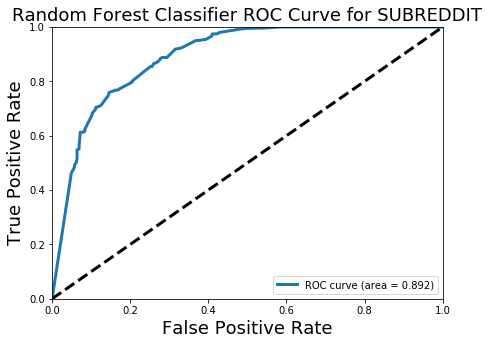

In [409]:
# Let's visualize the curve

rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve for SUBREDDIT', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

### Create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title.
### Build a new Random Forest with these features. Do they add any value?

In [410]:
df_scraped.Title.head()

0    the rock stunt doubl is also hi reallif cousin...
1    imag found a note from 2 month ago made a few ...
2                               the next wayn gretzki 
3    joel mchale say e told him to lay off the kard...
4                                       it’ the truth 
Name: Title, dtype: object

In [411]:
def remove_punctuation(text):
    lower = text.lower()   #makes all text lowercase
    exclude = set(string.punctuation)    #can tell it to exclude punctuation marks. 
    return "".join(ch for ch in lower if ch not in exclude)  #will return the string of text if the character 
                                                             #for each character in lower and is not in the 
                                                             #excluded puncuation

In [412]:
df_scraped['Title'] = df_scraped['Title'].apply(remove_punctuation)

In [413]:
df_scraped['Title'].head()

0    the rock stunt doubl is also hi reallif cousin...
1    imag found a note from 2 month ago made a few ...
2                               the next wayn gretzki 
3    joel mchale say e told him to lay off the kard...
4                                       it’ the truth 
Name: Title, dtype: object

In [414]:
#Now let's try using PorterStemmer to reduce each word to it's 'stem'

stemmer = PorterStemmer()

def stems(string):
    string = string.split(' ')
    temp = ""
    for i in string:
        temp += (stemmer.stem(i) + " ")
    return temp

In [415]:
df_scraped['Title'] = df_scraped['Title'].apply(stems)

In [416]:
df_scraped['Title'].head()

0    the rock stunt doubl is also hi reallif cousin...
1    imag found a note from 2 month ago made a few ...
2                              the next wayn gretzki  
3    joel mchale say e told him to lay off the kard...
4                                      it’ the truth  
Name: Title, dtype: object

In [417]:
## FIND 'CAT' IN TITLES AND CREATE NEW COLUMN 
word = 'cat'
word_list = [] 
for row in df_scraped.Title:  
    if word in row: 
        word_list.append(1)
    else: 
        word_list.append(0)

df_scraped['Cat'] = word_list

In [418]:
df_scraped.Cat.value_counts()

0    4866
1     134
Name: Cat, dtype: int64

In [419]:
# USE CAT AS PREDICTOR 
X = df_scraped['Cat'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [420]:
# FIT MODEL FOR CAT PREDICTOR 
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [421]:
# SCORE FOR TRAIN DATA ON CAT 
rfc.score(X_train, y_train)

0.50314285714285711

In [422]:
# SCORED FOR TEST DATA ON CAT 
rfc.score(X_test, y_test)

0.51200000000000001

In [423]:
print("\nClassification Report for CAT:\n",classification_report(y_test, predictions))

# What is this telling us? 
# Using the word "CAT" in a title thread has some affect on "COMMENTS" 


Classification Report for CAT:
              precision    recall  f1-score   support

          0       0.84      0.75      0.79       751
          1       0.77      0.85      0.81       749

avg / total       0.80      0.80      0.80      1500



In [424]:
# Determine our AUC score and visualize our ROC curve

rfc_y_score = rfc.predict_proba(X_test)[:, 1] #<-- formats output as one long array
rfc_y_score

array([ 0.49398906,  0.49398906,  0.49398906, ...,  0.49398906,
        0.49398906,  0.49398906])

In [425]:
print(roc_auc_score(y_test, rfc_y_score))  # TRUE-POSITIVES ONLY?


0.511366242429


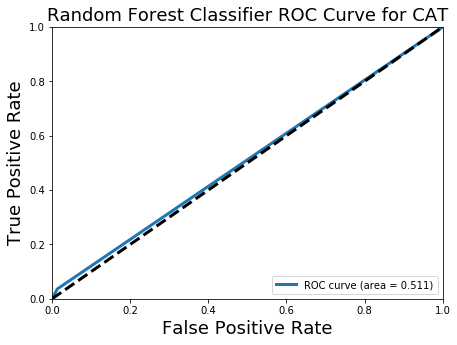

In [426]:
# Let's visualize the curve

rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve for CAT', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [427]:
## FIND 'FUNNY' IN TITLES AND CREATE NEW COLUMN 
word = 'funny'
word_list = [] 
for row in df_scraped.Title:  
    if word in row: 
        word_list.append(1)
    else: 
        word_list.append(0)

df_scraped['Funny'] = word_list

In [428]:
df_scraped.Funny.value_counts()

0    5000
Name: Funny, dtype: int64

In [429]:
# USE FUNNY AS PREDICTOR 
X = df_scraped['Funny'].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\CHIWLONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [430]:
# FIT MODEL FOR FUNNY PREDICTOR 
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [431]:
# SCORE FOR TRAIN DATA ON FUNNY 
rfc.score(X_train, y_train)

0.50057142857142856

In [432]:
# SCORED FOR TEST DATA ON FUNNY 
rfc.score(X_test, y_test)

0.5006666666666667

In [433]:
predictions = rfc.predict(X_test)  # Get our models predictions based on the X_test data
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [434]:
len(predictions)

1500

In [435]:
print("\nClassification Report:\n",classification_report(y_test, predictions))

# What is this telling us? 
# Hmm, FUNNY in Title not so good a predictor. 


Classification Report:
              precision    recall  f1-score   support

          0       0.50      1.00      0.67       751
          1       0.00      0.00      0.00       749

avg / total       0.25      0.50      0.33      1500



C:\Users\CHIWLONG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [436]:
# Determine our AUC score and visualize our ROC curve

rfc_y_score = rfc.predict_proba(X_test)[:, 1] #<-- formats output as one long array
rfc_y_score

array([ 0.4946,  0.4946,  0.4946, ...,  0.4946,  0.4946,  0.4946])

In [437]:
print(roc_auc_score(y_test, rfc_y_score))  # TRUE-POSITIVES ONLY

0.5


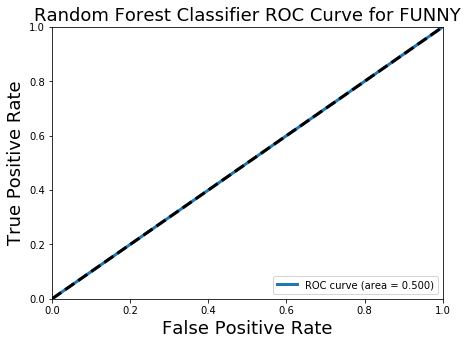

In [438]:
# Let's visualize the curve

rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve for FUNNY', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [439]:
# #determine most important features/words in our model
# rfc_feature_importances = pd.DataFrame(rfc.feature_importances_,
#                                    index = X.columns,
#                                     columns=['importance']).sort_values('importance',
#                                     ascending=False)
# print(rfc_feature_importances.head(10))
# rfc_feature_importances.head(10).sum()


In [440]:
# COMBINE FEATURES AND BUILD NEW MODEL 
X = df_scraped['Subreddit'] 

# need to transform subreddit text to binary and join cat and funny to df X
X = pd.DataFrame(cvec.fit_transform(X).todense(),
            columns=cvec.get_feature_names()).join(df_scraped[['Cat', 'Funny']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [441]:
# FIT MODEL FOR MULTIPLE PREDICTORS 
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [442]:
# SCORE FOR TRAIN DATA ON MULTIPLE PREDICTORS 
rfc.score(X_train, y_train)

0.85771428571428576

In [443]:
# SCORE FOR TEST DATA ON MULTIPLE PREDICTORS
rfc.score(X_test, y_test)

0.80733333333333335

In [444]:
predictions = rfc.predict(X_test)  # Get our models predictions based on the X_test data
predictions

array([0, 1, 1, ..., 1, 0, 1])

In [445]:
len(predictions)

1500

In [446]:
print("\nClassification Report:\n",classification_report(y_test, predictions))

# What is this telling us? 
# Looks fairly accurate, but not great. 


Classification Report:
              precision    recall  f1-score   support

          0       0.82      0.79      0.80       751
          1       0.80      0.82      0.81       749

avg / total       0.81      0.81      0.81      1500



In [447]:
# Determine our AUC score and visualize our ROC curve

rfc_y_score = rfc.predict_proba(X_test)[:, 1] #<-- formats output as one long array
rfc_y_score

array([ 0.       ,  1.       ,  1.       , ...,  1.       ,  0.4592739,  1.       ])

In [448]:
print(roc_auc_score(y_test, rfc_y_score))  # TRUE-POSITIVES ONLY


0.895794481412


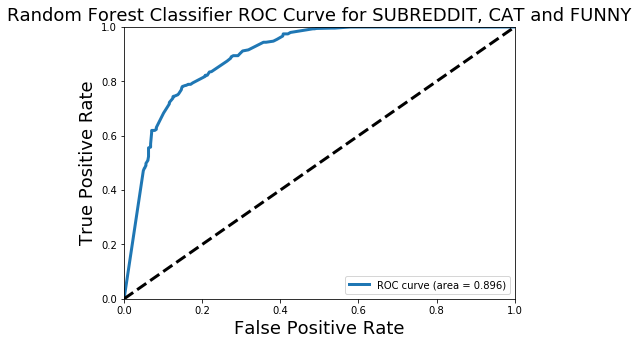

In [449]:
# Let's visualize the curve

rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve for SUBREDDIT, CAT and FUNNY', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [450]:
## YOUR CODE HERE
from sklearn import datasets
from sklearn import svm

In [451]:
## YOUR CODE HERE
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_train, y_train)  

0.85399999999999998

In [452]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores 

array([ 0.78737542,  0.79666667,  0.81666667,  0.77666667,  0.84615385])

#### Repeat the model-building process with a non-tree-based method.

In [453]:
# TRY LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [454]:
lr = LogisticRegression(random_state=42, solver='liblinear')

In [455]:
X.shape

(5000, 438)

In [456]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [457]:
print('mean: ' + str(np.mean(lr.coef_)))
print('median: ' + str(np.median(lr.coef_))) # <== beta coefficient for X values 

mean: -0.00592780826892
median: -0.371922553474


In [458]:
# Both coefficients are very low (near zero). This means that Title has little predictive power for Comments. 

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [514]:
#we want to first define our x and y variables and instantiate a CountVectorizer
X = df_scraped['Title']
y = df_scraped['High']

In [515]:
cvec = CountVectorizer(stop_words = 'english')  #let's exclude stopwords, then fit and transform our x data

In [516]:
X  = pd.DataFrame(cvec.fit_transform(X).todense(),
             columns=cvec.get_feature_names())

In [517]:
X.head()

,10,100,1040x1485,105,10cm,110,1126,1198,125000year,1280,...,yup,yuzuru,zeppelin,zhe,zhong,zone,zoop,ｃｈｏｏｓｅ,ｆｌａｖｏｕｒ,ｙｏｕｒ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [518]:
X.shape

(5000, 2646)

In [519]:
# split our data into our training and test sets! 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [520]:
# use a random forest classifier

rfc = RandomForestClassifier()

In [521]:
# fit our model

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [522]:
# score our model on the training and test sets 

rfc.score(X_train, y_train)

0.99257142857142855

In [523]:
rfc.score(X_test, y_test)   # What does this output/score mean? Is this good? 97% - not too shabby. 

0.97999999999999998

In [524]:
# What was our base model score?
base_score = np.median(y_test)
base_score

0.0

In [525]:
predictions = rfc.predict(X_test)  # we need to get our models predictions based on the x_test data
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [526]:
len(predictions)

1500

In [527]:
conmat = pd.DataFrame(confusion_matrix(y_test, predictions), 
                      columns=['predicted_low(0)', 'predicted_high(1)'], 
                      index=['is_low(0)', 'is_high(1)'])

In [528]:
print("\nClassification Report:\n",classification_report(y_test, predictions))

# What is this telling us? 
# Looks pretty accurate. 


Classification Report:
              precision    recall  f1-score   support

          0       0.99      0.97      0.98       786
          1       0.97      0.99      0.98       714

avg / total       0.98      0.98      0.98      1500



In [529]:
# Determine AUC score and visualize ROC curve

rfc_y_score = rfc.predict_proba(X_test)[:, 1] #<-- formats output as one long array
rfc_y_score

array([ 0.,  0.,  1., ...,  0.,  0.,  0.])

In [530]:
print(roc_auc_score(y_test, rfc_y_score))  # TRUE-POSITIVES ONLY


0.996420196577


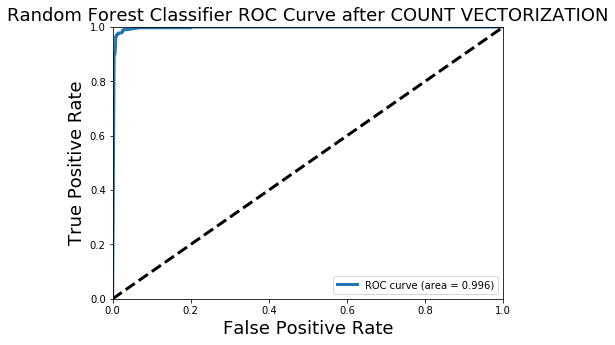

In [531]:
# Visualize the curve

rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve after COUNT VECTORIZATION', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [532]:
# Determine most important features/words in our model
rfc_feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
print(rfc_feature_importances.head(10))
rfc_feature_importances.head(10).sum()


              importance
day             0.008890
2meirl4meirl    0.006123
truth           0.006009
happen          0.005905
reason          0.005806
door            0.005533
boo             0.005499
help            0.005470
noth            0.005394
school          0.005306


importance    0.059935
dtype: float64

In [534]:
#we want to first define our x and y variables and instantiate a CountVectorizer
X = df_scraped['Subreddit']
y = df_scraped['High']

In [535]:
cvec = CountVectorizer(stop_words = 'english')  #let's exclude stopwords, then fit and transform our x data

In [536]:
X  = pd.DataFrame(cvec.fit_transform(X).todense(),
             columns=cvec.get_feature_names())

In [537]:
X.head()

,2healthbars,2meirl4meirl,30rock,abandonedporn,absolutelynotmeirl,adventuretime,againsthatesubreddits,amateurroomporn,analog,android,...,worldnews,writingprompts,xboxone,yesyesyesyesno,youdontsurf,youseeingthisshit,youtubehaiku,zelda,zerowaste,zoomies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [538]:
X.shape

(5000, 436)

In [539]:
# split our data into our training and test sets! 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [540]:
# use a random forest classifier

rfc = RandomForestClassifier()

In [541]:
# fit our model

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [542]:
# score our model on the training and test sets 

rfc.score(X_train, y_train)

0.8422857142857143

In [543]:
rfc.score(X_test, y_test)   # What does this output/score mean? Is this good? 97% - not too shabby. 

0.83199999999999996

In [544]:
# What was our base model score?
base_score = np.median(y_test)
base_score

1.0

In [545]:
predictions = rfc.predict(X_test)  # we need to get our models predictions based on the x_test data
predictions

array([1, 1, 1, ..., 1, 0, 0])

In [546]:
len(predictions)

1500

In [547]:
conmat = pd.DataFrame(confusion_matrix(y_test, predictions), 
                      columns=['predicted_low(0)', 'predicted_high(1)'], 
                      index=['is_low(0)', 'is_high(1)'])

In [548]:
print("\nClassification Report:\n",classification_report(y_test, predictions))

# What is this telling us? 
# Looks pretty accurate. 


Classification Report:
              precision    recall  f1-score   support

          0       0.85      0.80      0.82       742
          1       0.81      0.87      0.84       758

avg / total       0.83      0.83      0.83      1500



In [549]:
# Determine AUC score and visualize ROC curve

rfc_y_score = rfc.predict_proba(X_test)[:, 1] #<-- formats output as one long array
rfc_y_score

array([ 0.51839407,  0.72379032,  1.        , ...,  0.68573376,
        0.1       ,  0.5       ])

In [550]:
print(roc_auc_score(y_test, rfc_y_score))  # TRUE-POSITIVES ONLY


0.912168673414


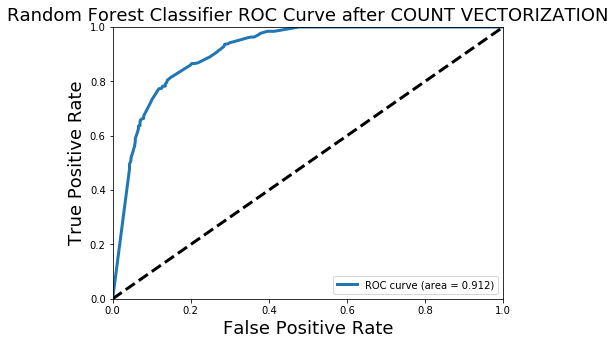

In [551]:
# Visualize the curve

rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve after COUNT VECTORIZATION', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [552]:
# Determine most important features/words in our model
rfc_feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
print(rfc_feature_importances.head(10))
rfc_feature_importances.head(10).sum()


                importance
aww               0.023996
news              0.018547
showerthoughts    0.013864
prequelmemes      0.013737
gaming            0.012902
askreddit         0.009493
pics              0.009334
gifs              0.008333
movies            0.008022
jokes             0.007075


importance    0.125302
dtype: float64

# Executive Summary
---
Put your executive summary in a Markdown cell below.

Fivethirtyeight is great at what it does - STATS. The numbers and charts are fantastic, but the audience is stagnant. How do you drive the world to find out about your brilliant stats and conclusions? 

Reddit is an online message board that allows users to post their thoughts about the topics of the day, as heard in the world, at a specific moment in time. 

Consistently getting your fivethirtyeight posts in the top of the ‘Hot’ pages on Reddit will drive consumer awareness and grow your brand. 

Our proposal will show you how to make your posts ‘Hot’ on Reddit! 


### BONUS
Refer to the README for the bonus parts

In [513]:
## YOUR CODE HERE

### THE GRAVEYARD OF LEFTOVER CODE (R.I.P.)